# News articles data analysis.

### Notes:
- Before we make our wordclouds and apply classification and clustering methods to our data,
    we make sure to run *generate_train_test_sets.ipynb*, in order to create the train and test sets.
  

## Preparations

### Importing Data

In [160]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data.tsv", sep='\t', encoding = 'ANSI')

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            ENGLISH_STOP_WORDS as stop_words
                                            
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import make_scorer,    \
                            accuracy_score, \
                            precision_score,\
                            recall_score,   \
                            f1_score

from sklearn import datasets, svm
import sklearn.preprocessing
# Natural language processing kit imports.
from nltk.stem import WordNetLemmatizer

### Function prototype for text preprocessing.

<span style="color:DeepPink">**preprocess_article**</span>**(text)**  
&nbsp;&nbsp;Removes special characters from a given string object, removes stop words and lematizes words using WordNetLematizer().  
&nbsp;&nbsp;&nbsp;**Parameters: &nbsp;&nbsp;&nbsp;text : str**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
String object to process. 

&nbsp;&nbsp;&nbsp;**Returns: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;text : str**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Lowercase lematized string object without stopwords and several special characters.

In [162]:
import re

In [163]:
stop_words = list(stop_words)

""" In previous version of our project, the wordclouds below showed that 'said' and 'say' words
    appear the most in the data, so we decided to remove them as they has no valuable meaning. """
# stop_words.extend(['said','say'])
wordnet_lemmatizer = WordNetLemmatizer()

""" Make sure that the text parameter and return variable are of string type. """
def preprocess_article(text: str) -> str:
    # Remove newlines and \r characters.
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    
    # Remove quotes
    text = text.replace('"', ' ')
   
    # Convert text to lowercase.
    text = text.lower()
    
    # Remove punctuation and many special characters.
    text = text.translate(str.maketrans('', '', '!?:\';.,[]()@#$%^&*£'))
   
    # Remove terminating 's characters.
    text = text.replace("'s", "")

    # Remove stop words. Note: do this first and then lemmatize because lemmatizing
    # can change words like 'has' to 'ha'.
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Lematize text with WordNetLemmatizer().
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split(' ')])
    
    # Remove all words with numbers in them (ie. 400bn, 512kbps etc.) .
    text = re.sub(r'\w*\d\w*', '', text).strip()
    
    return text

### Article content preprocessing
Apply the above function to the content column. It will result it better wordclouds and produce better classification results.

In [164]:
df['content'] = df['content'].apply(preprocess_article)
df.head()

,id,title,content,category
0,0,Ad sales boost Time Warner profit\r\n,quarterly profit medium giant timewarner jumpe...,business
1,1,Dollar gains on Greenspan speech\r\n,dollar hit highest level euro month federal re...,business
2,2,Yukos unit buyer faces loan claim\r\n,owner embattled russian oil giant yukos ask bu...,business
3,3,High fuel prices hit BA's profits\r\n,british airway blamed high fuel price drop pr...,business
4,4,Pernod takeover talk lifts Domecq\r\n,share uk drink food firm allied domecq risen s...,business


In [124]:
text = "hi here is 500%$£!?:\';.,[]()adfasd"
print(text)
text = text.translate(str.maketrans('', '', '%$£!?:\';.,[]()'))
text

hi here is 500%$£!?:';.,[]()adfasd


'hi here is 500adfasd'

## 1. Word Clouds per Category

For the wordclouds we need all the data we've got.

In [140]:
from wordcloud import WordCloud

This function takes as parameter a string representing one of the dataframe's categories,
and returns all the articles' content in that category as a string.

In [154]:
def choose_category_content(category: str) -> str:
    articles_series = df[df['category'] == category]['content']
    words = ' '.join(articles_series)
    return words

def wordcloud(category):
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        background_color = "white",
        min_font_size = 10).generate(choose_category_content(category))

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Build wordclouds

### Business Word Cloud

In [322]:

# entertainment_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('entertainment'))

# politics_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('politics'))

# sport_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('sport'))

# tech_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('tech'))

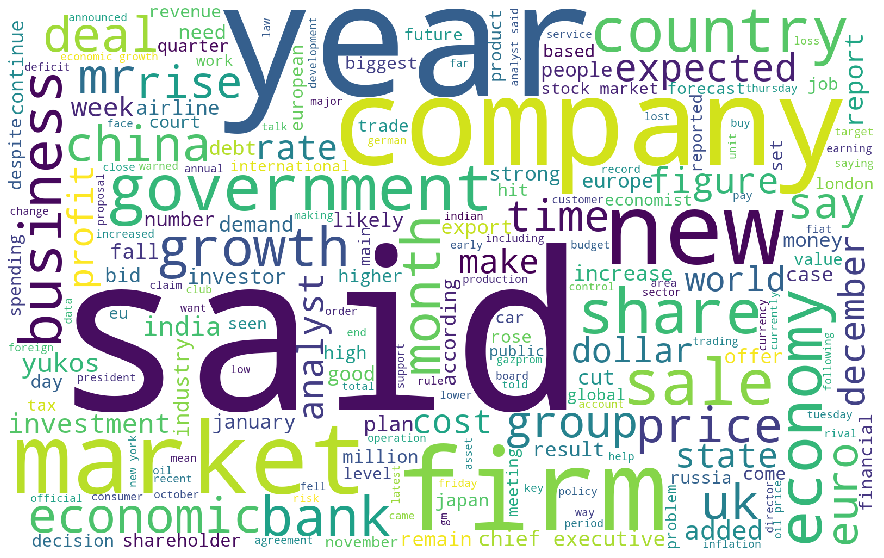

In [165]:
wordcloud("business")

### Entertainment Word Cloud

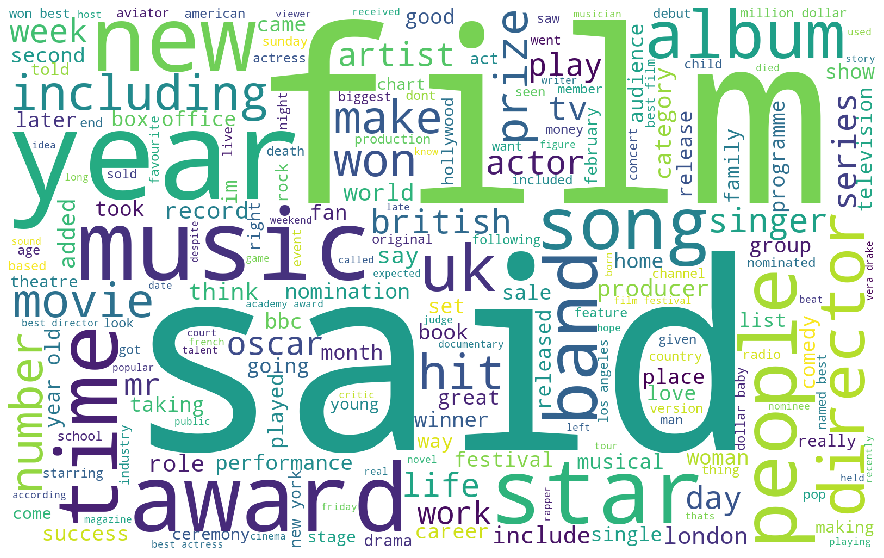

In [169]:
wordcloud("entertainment")

### Politics Word Cloud

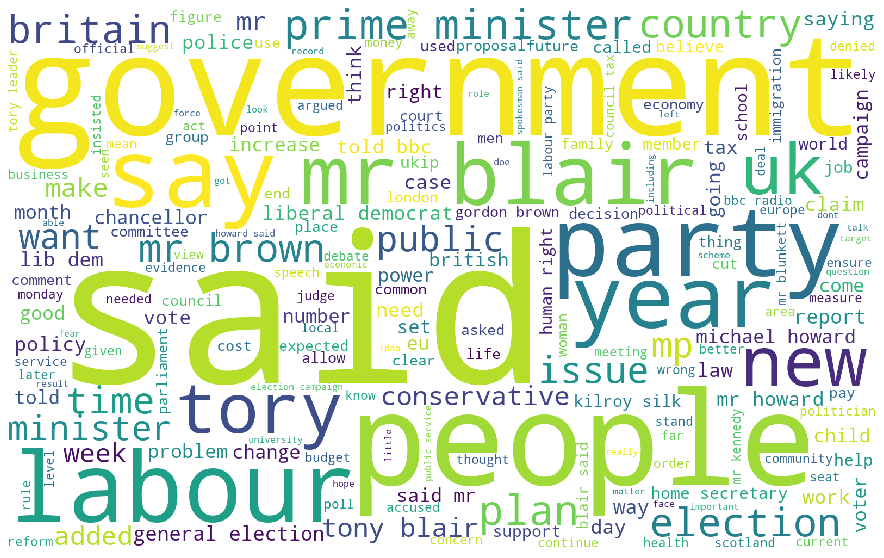

In [168]:
wordcloud("politics")

### Sport Word Cloud

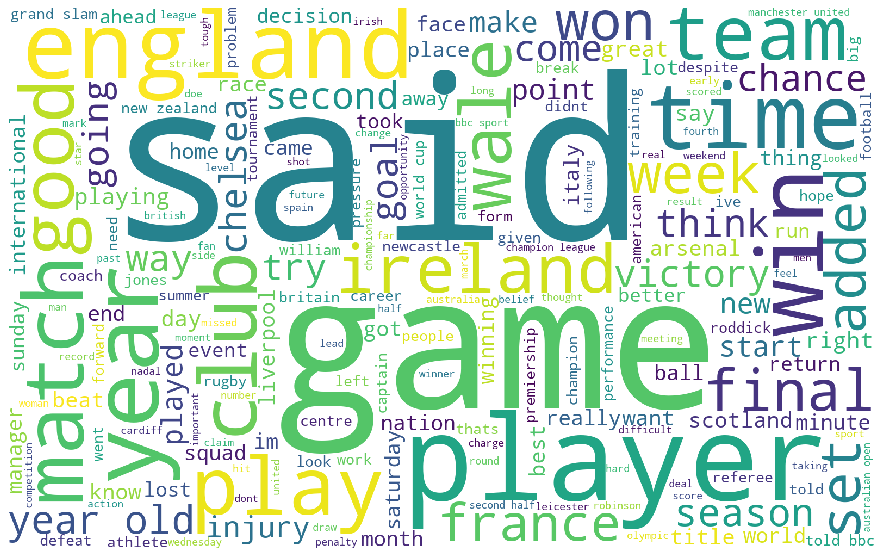

In [166]:
wordcloud("sport")

### Tech Word Cloud

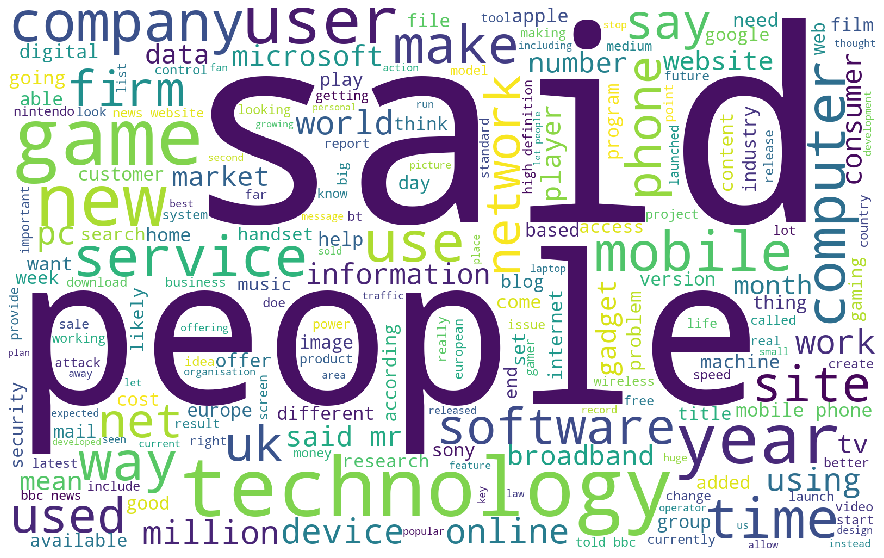

In [167]:
wordcloud("tech")

## Just a few worth-reading observations regarding the wordclouds
First of all, most of the words in each word clouds are pretty relevant to the respective categories.
Another interesting thing is the word **said**. One quick logical thought is that it would alter the classification results, either little or more, it doesn't matter.

We can prove that it won't, by doing a chi-squared test on our data.

Chi-squared test can measure 


In [184]:
# df['category_id'] = df.category.factorize()[0]

In [183]:
# tf_idf = TfidfVectorizer(max_features = 100, ngram_range = (1, 2))

# features = tf_idf.fit_transform(df.content).toarray()
# features.shape

In [182]:
# from sklearn.feature_selection import chi2
# N = 2
# labels = df.category_id
# for category, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tf_idf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(category))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

## 2 Classification



### 2.1 Dataset splitting


In [201]:
content_train, content_test, category_train, category_test = train_test_split(df['content'],
                                                                              df['category'],
                                                                              test_size = 0.2,
                                                                              stratify = df['category'])

### 2.2 Train/Test Label Encoding and Content Vectorization

For the categories we will use the LabelEncoder.

In [206]:
le = preprocessing.LabelEncoder()
le.fit(category_train)
label_train = le.transform(category_train)
label_test = le.transform(category_test)
# print(label_train)
# print(label_test)

#### 2.2.a Using CountVectorizer

In [208]:
count_vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1,2))

In [209]:
cv_content_train = count_vectorizer.fit_transform(content_train)
cv_content_test = count_vectorizer.fit_transform(content_test)

#### 2.2.a Using Term Frequency - Inverse Document Frequency Vectorizer

In [211]:
tf_idf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

In [212]:
tf_idf_content_train = tf_idf.fit_transform(content_train)
tf_idf_content_test = tf_idf.fit_transform(content_test)

### Support Vector Machines (SVM)

In [106]:
classifier = svm.SVC(kernel='linear')

In [107]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
# precisions = cross_val_score(classifier, x_train, y_train, cv=10, scoring='precision_micro')

In [110]:
# precisions.mean()

In [112]:
y_predict_test = classifier.predict(X_test)


In [114]:
# y_predict_test

In [116]:
test_text = ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]
test = count_vectorizer.transform(test_text)
test
# count_vectorizer.get_feature_names()
manual_predict_test = classifier.predict(test)

ValueError: cannot use sparse input in 'SVC' trained on dense data

In [77]:
le.fit(y_predict_test)
y_predict_test = le.transform(y_predict_test)
# score_test = metrics.f1_score(y_test, y_predict_test, average = 'micro')

In [176]:
score_test

0.34606741573033706

In [24]:
C = [.0001, .001, .01, 1]
# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]
# kernel
kernel = ['rbf','linear']
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma
             }
display(random_grid)

{'C': [0.0001, 0.001, 0.01, 1],
 'kernel': ['rbf', 'linear'],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'degree': [1, 2, 3, 4, 5],
 'probability': [True]}

In [ ]:



kfold = model_selection.KFold(n_splits=10, random_state=42)
model=RandomForestClassifier(n_estimators=50) 

results = model_selection.cross_val_score(estimator=model,
                                          X=features,
                                          y=labels,
                                          cv=kfold,
                                          scoring=scoring)